# Exploratory Data Visualization for the Physical Properties of Lakes

This lesson was adapted from educational material written by [Dr. Kateri Salk](https://www.hydroshare.org/user/4912/) for her Fall 2019 Hydrologic Data Analysis course at Duke University. This is the second part of a two-part exercise focusing on the physical properties of lakes. 

## Introduction

The field of **limnology**, the study of inland waters, uses a unique graph format to display relationships of variables by depth in a lake (the field of oceanography uses the same convention). Depth is placed on the y-axis in reverse order and the other variable(s) are placed on the x-axis. In this manner, the graph appears as if a cross section were taken from that point in the lake, with the surface at the top of the graph. This lesson introduces physical properties of lakes, namely stratification, and its visualization using the package `ggplot2`.

## Learning Objectives

After successfully completing this notebook, you will be able to:

1. Investigate the concepts of lake stratification and mixing by analyzing monitoring data
2. Apply data analytics skills to applied questions about physical properties of lakes
3. Communicate findings with peers through oral, visual, and written modes

## Requirements to Complete Lesson 

### Packages
This lesson requires the installation of the following R packages to run the provided script:
- `ggplot2`- Version 3.3.3. Creates elegant data visualisations using the Grammar of Graphics.
- `tidyverse`- Version 1.3.0. A collection of R packages designed for data science.
- `lubridate`- Version 1.7.9. Functions for working with dates/times.
- `scales`-Version 1.1.1. Graphical scales provide methods for automatically determining breaks and labels for axes and legends.


### Data and Code

The input files are made available to you in a public folder. 

This lesson also requires the dataset <span style="color:blue">NTER-LTER_Lake_ChemistryPhysics_Raw.csv. </span><br> 

The dataset used in this lesson contains data from studies on several lakes in the North Temperate Lakes District in the state of Wisconsin. The data were collected as part of the Long Term Ecological Research station created by the National Science Foundation.  More information can be found here: https://lter.limnology.wisc.edu/about/overview. 

The code provided in this resource was developed using R version 3.6.1. 

### Set Working Directory

In R, the working directory is the directory where R starts when looking for any file to open (as directed by a file path) and where it saves any output. This lesson assumes that you have set your working directory to the folder location of the downloaded and unzipped data subsets. 

### Load Packages and set ggplot theme

In [40]:
options(warn=-1)

library(ggplot2)
library(tidyverse)
library(lubridate)
library(scales)

theme_set(theme_gray()) #set ggplot2 theme

### Load Data from Part 1

In [41]:
NTLdata <- read.csv("NTL-LTER_Lake_ChemistryPhysics_Raw.csv")

### From Part 1: Filter data

In [42]:
NTLdata <- NTLdata %>%
  filter(lakename %in% c("Paul Lake", "Peter Lake", "Tuesday Lake"))

### From Part 1: Use `drop_na`function to omit rows containing missing Temperature values

In [43]:
NTLdata <- NTLdata %>%
  drop_na(temperature_C)

### From Part 1: Use `as.Date` function to convert "sampledate" field into a Date class

In [44]:
NTLdata$sampledate <- as.Date(NTLdata$sampledate, "%m/%d/%y")

### From Part 1: Create three separate data frames for each lake

In [45]:
Pauldata <- filter(NTLdata, lakename == "Paul Lake")
Peterdata <- filter(NTLdata, lakename == "Peter Lake")
Tuesdaydata <- filter(NTLdata, lakename == "Tuesday Lake")

# Exploratory Data Visualization 

## Plot of Temperature by Depth at Paul Lake

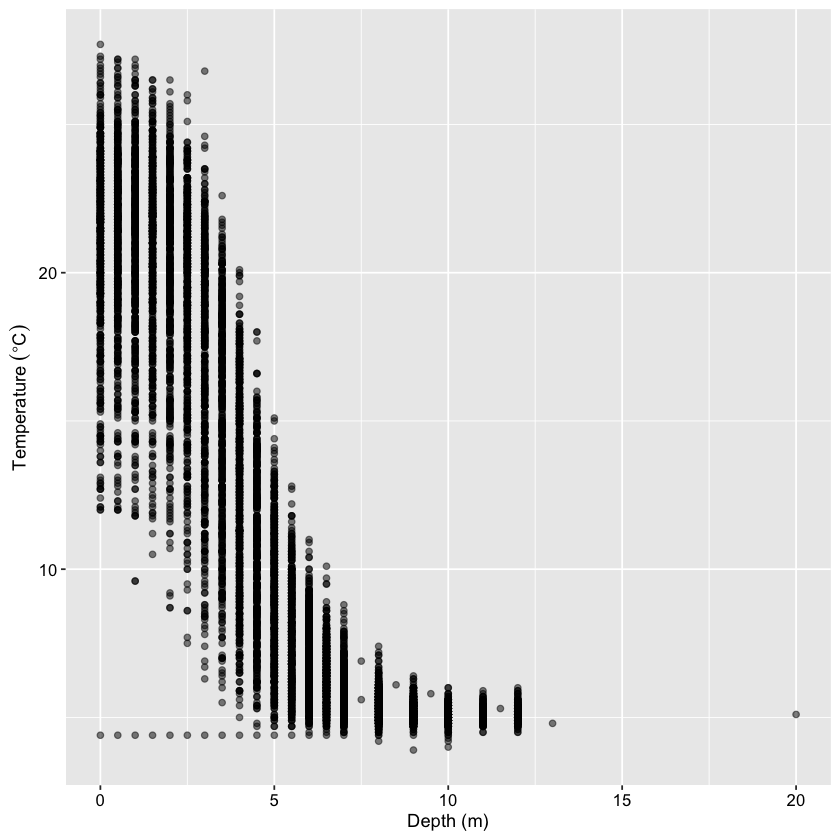

In [46]:

TempvsDepth <- 
  ggplot(Pauldata, aes(x = depth, y = temperature_C)) + 
  geom_point(alpha = 0.5) +
  labs(y = expression("Temperature "(degree*C)), x = "Depth (m)")+
 theme(axis.text.x = element_text(color = "black", size=10), axis.text.y = element_text(color = "black", size=10))
print(TempvsDepth)


Based on the resulting plot, how do temperatures at the surface compare to temperatures at the mid-depths and bottom?

> Answer:

### Create data frames of Paul Lake data at specific depths (meters) from 2000s and later

First, filter the Paul Lake dataframe by observations taken from the year 2000 and later.

In [47]:
Pauldata2000s <- filter(Pauldata, year4 > 1999)

Next, filter the Paul Lake 2000s dataframe by different depth values in meters (start at the surface and end at bottom depth value of Paul Lake). For brevity, we will skip a couple of depth values.

In [48]:
Pauldata.surface <- filter(Pauldata2000s, depth == 0) 
Pauldata.2m <- filter(Pauldata2000s, depth == 2)
Pauldata.3m <- filter(Pauldata2000s, depth == 3)
Pauldata.4m <- filter(Pauldata2000s, depth == 4)
Pauldata.5m <- filter(Pauldata2000s, depth == 5)
Pauldata.6m <- filter(Pauldata2000s, depth == 6)
Pauldata.7m <- filter(Pauldata2000s, depth == 7)
Pauldata.9m <- filter(Pauldata2000s, depth == 9)
Pauldata.bottom <- filter(Pauldata2000s, depth == 12)

## Plot a graph of date vs. temperature at 0 m, 2 m, 9 meters, and 12 m

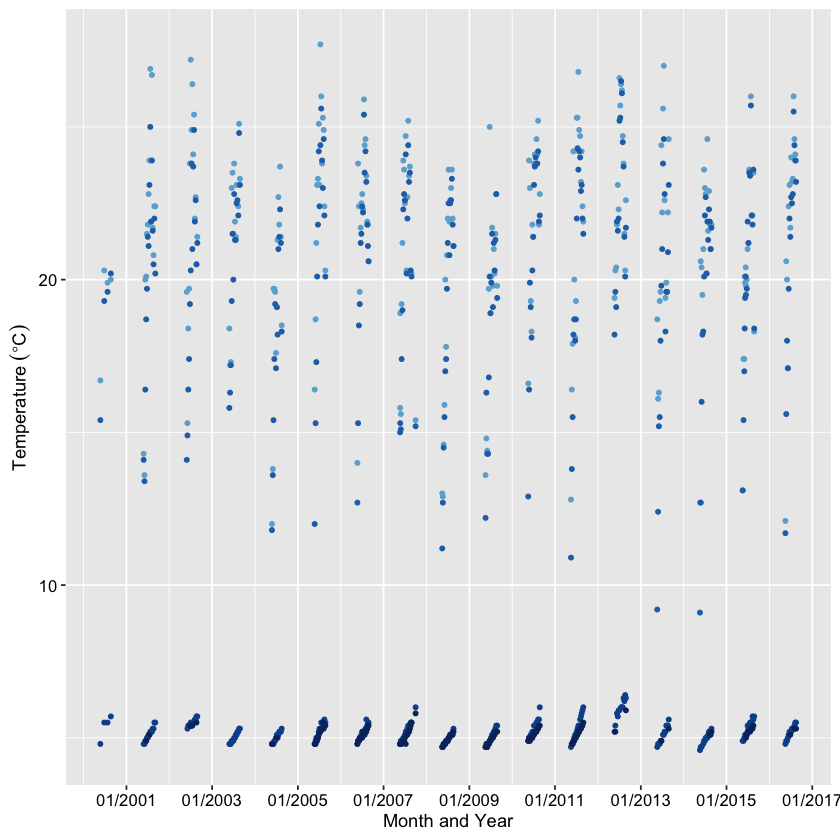

In [49]:
Tempplot.mixed <- 
  ggplot(Pauldata.surface, aes(x = sampledate, y = temperature_C)) +
  geom_point(color = "#6baed6", size = 1) + 
  geom_point(data = Pauldata.2m, aes(x = sampledate, y = temperature_C), 
             color = "#2171b5", size = 1) +
  geom_point(data = Pauldata.9m, aes(x = sampledate, y = temperature_C), 
             color = "#08519c", size = 1) +
  geom_point(data = Pauldata.bottom, aes(x = sampledate, y = temperature_C), 
             color = "#08306b", size = 1) +
  labs(y = expression("Temperature "(degree*C)), x = "Month and Year")+
scale_x_date(breaks=scales::breaks_width("2 years"), date_labels = "%m/%Y")+
theme(axis.text.x = element_text(color = "black", size=10), axis.text.y = element_text(color = "black", size=10))
print(Tempplot.mixed)

How do temperatures at the surface compare to those at 2 m depth? How do temperatures at the bottom compare to those at 9 m depth?

> Answer:

## Plot a graph of date vs. temperature at 0 m, 4 m, 6 meters, and 12 m

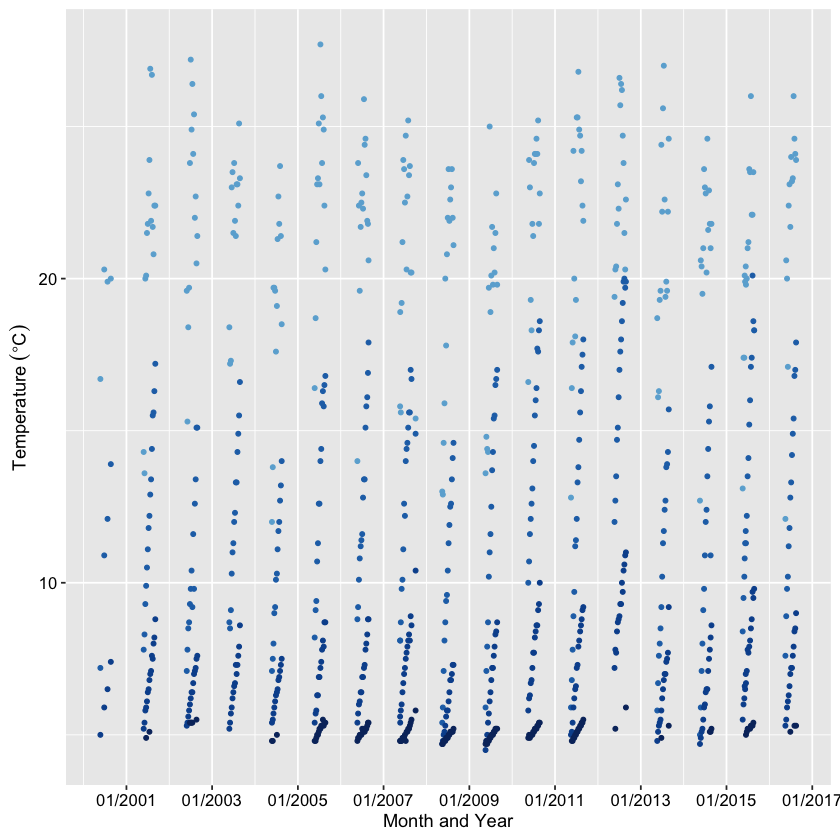

In [50]:
Tempplot.thermocline <- 
  ggplot(Pauldata.surface, aes(x = sampledate, y = temperature_C)) +
  geom_point(color = "#6baed6", size = 1) + 
  geom_point(data = Pauldata.4m, aes(x = sampledate, y = temperature_C), 
             color = "#2171b5", size = 1) +
  geom_point(data = Pauldata.6m, aes(x = sampledate, y = temperature_C), 
             color = "#08519c", size = 1) +
  geom_point(data = Pauldata.bottom, aes(x = sampledate, y = temperature_C), 
             color = "#08306b", size = 1) +
  labs(y = expression("Temperature "(degree*C)), x = "Month and Year")+
scale_x_date(breaks=scales::breaks_width("2 years"), date_labels = "%m/%Y")+
theme(axis.text.x = element_text(color = "black", size=10), axis.text.y = element_text(color = "black", size=10))

print(Tempplot.thermocline)

How do temperatures at 4 meters depth and 6 meters depth compare to the surface and bottom temperatures?

> Answer:

### Create four new dataframes from the Paul Lake Dataframe for the following sample dates in 2016: May 17, June 21, July 26,  and August 16

First, `filter` out data only from the year 2016 from the column `year4`.

In [51]:
Pauldata.2016 <- filter(Pauldata, year4 == 2016)

Next, `filter` out four sample dates from the 2016 Paul Lake dataframe from the column `sampledate`.

In [52]:
Pauldata.May2016 <- filter(Pauldata, sampledate == "2016-05-17")
Pauldata.June2016 <- filter(Pauldata, sampledate == "2016-06-21")
Pauldata.July2016 <- filter(Pauldata, sampledate == "2016-07-26")
Pauldata.Aug2016 <- filter(Pauldata, sampledate == "2016-08-16")

## Temperature Profile at Paul Lake in May 2016

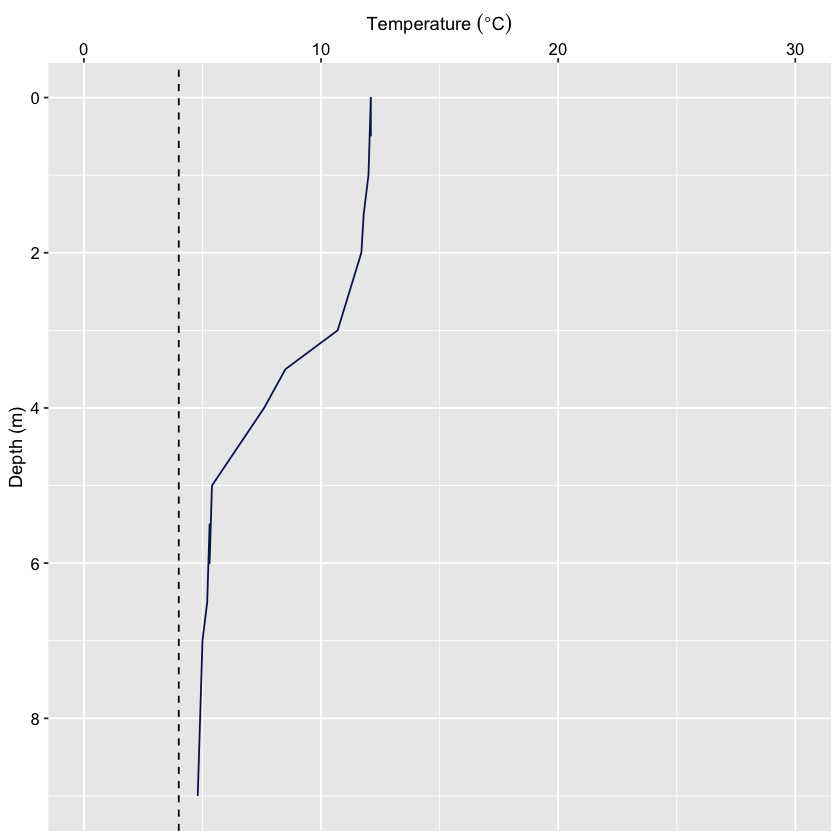

In [53]:
TempprofileMay2016 <- 
  ggplot(Pauldata.May2016, aes(x = temperature_C, y = depth)) +
  geom_line(color = "#081d58") +
  geom_vline(xintercept = 4, lty = 2) + ###this line represents 4 degrees celsius-this is the temp of the maximum density of water. 4 degrees is the coldest a lake will get. 
  scale_y_reverse(breaks = c(0, 2, 4, 6, 8, 10, 12)) + ###this is to flip the scales
  scale_x_continuous(position = "top", limits = c(0, 30)) +
  labs(x = expression("Temperature "(degree*C)), y = "Depth (m)")+
theme(axis.text.x = element_text(color = "black", size=10), axis.text.y = element_text(color = "black", size=10))
print(TempprofileMay2016)




## Add Temperature Profile at Paul Lake in June 2016 to May 2016 graph

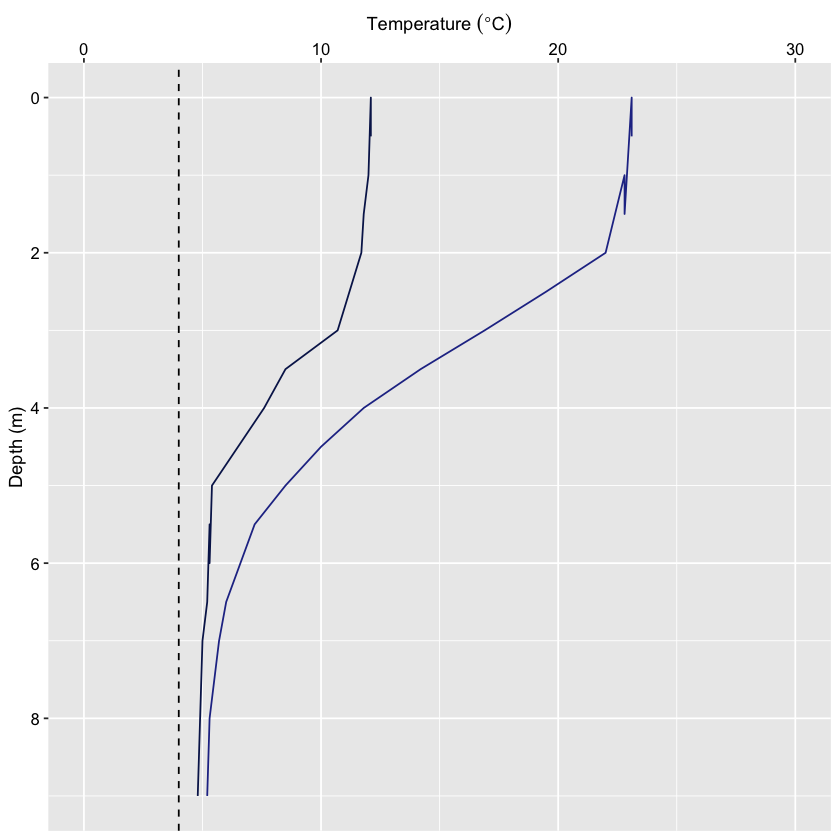

In [54]:

TempprofileJune2016 <- 
  TempprofileMay2016 +
  geom_line(data = Pauldata.June2016, aes(x = temperature_C, y = depth), 
            color = "#253494")+
theme(axis.text.x = element_text(color = "black", size=10), axis.text.y = element_text(color = "black", size=10))

print(TempprofileJune2016)


## Add Temperature Profile at Paul Lake in July 2016 to May and June graphs

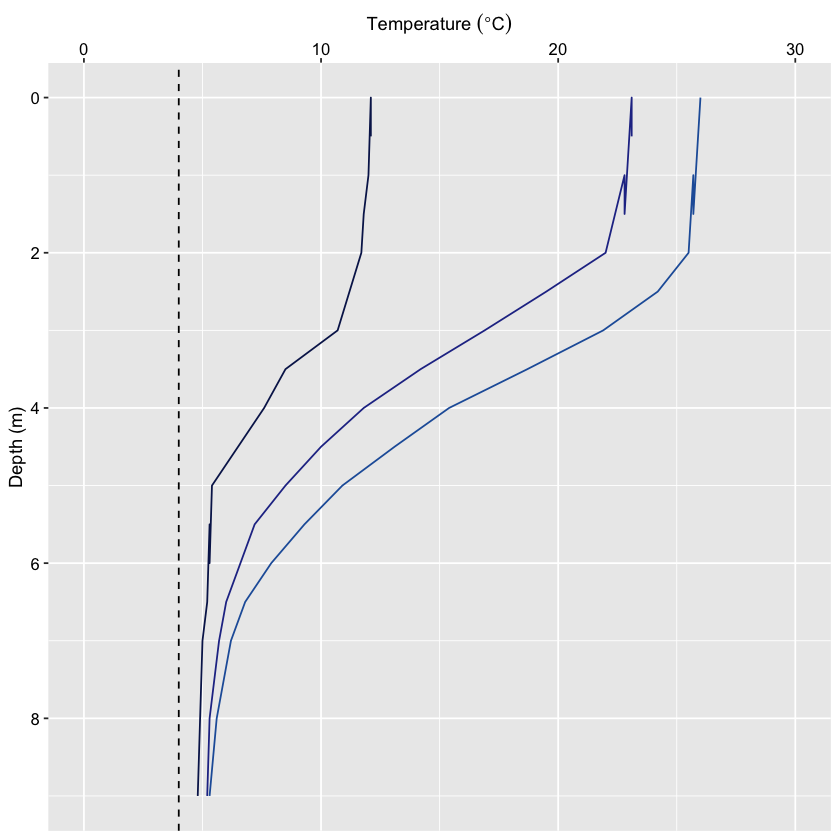

In [55]:
TempprofileJuly2016 <- 
  TempprofileJune2016 +
  geom_line(data = Pauldata.July2016, aes(x = temperature_C, y = depth), 
            color = "#225ea8")+
theme(axis.text.x = element_text(color = "black", size=10), axis.text.y = element_text(color = "black", size=10))
print(TempprofileJuly2016)

## Add Temperature Profile at Paul Lake in August 2016 to May, June, and July graphs

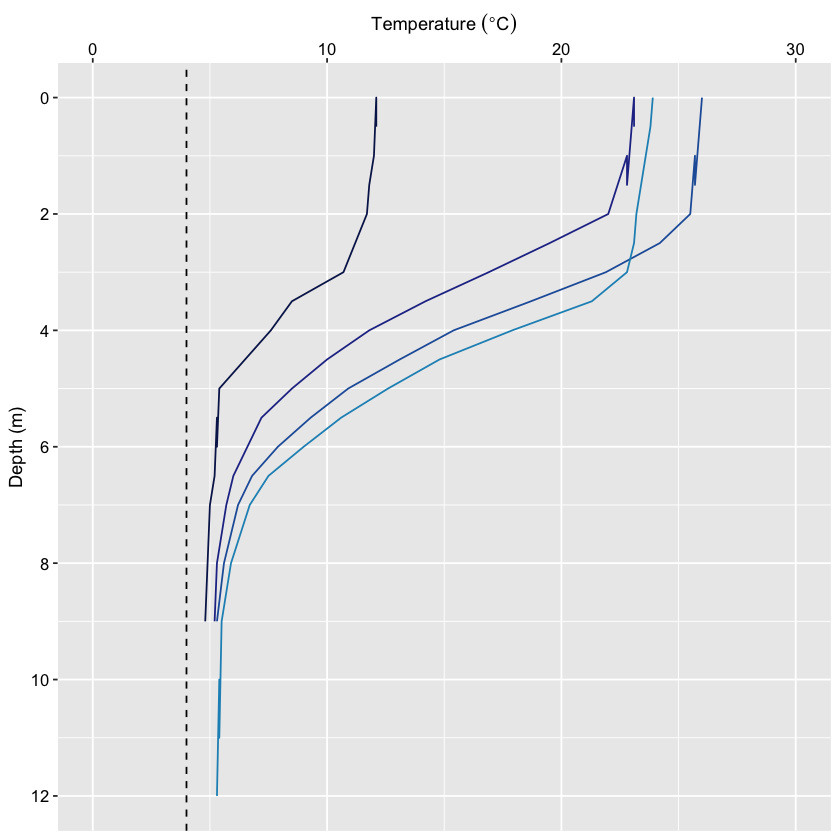

In [56]:
TempprofileAug2016 <- 
  TempprofileJuly2016 +
  geom_line(data = Pauldata.Aug2016, aes(x = temperature_C, y = depth), 
            color = "#1d91c0")+
theme(axis.text.x = element_text(color = "black", size=10), axis.text.y = element_text(color = "black", size=10))
print(TempprofileAug2016)

## Visualize all of the 2016 sampled dates at once

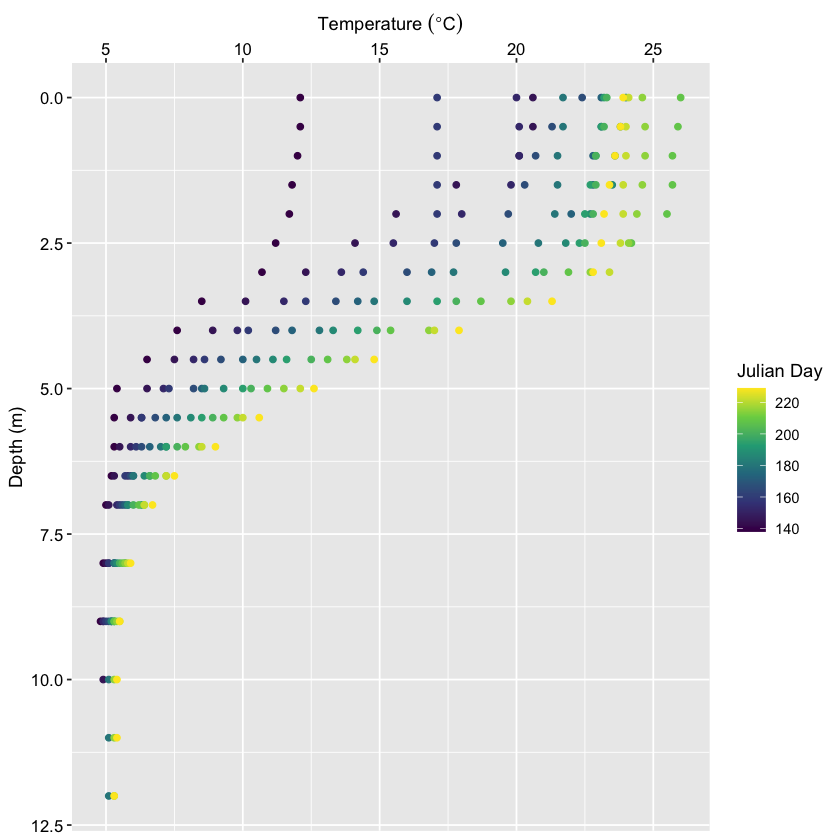

In [57]:
Tempprofiles2016 <- 
  ggplot(Pauldata.2016, aes(x = temperature_C, y = depth, color = daynum)) +
  geom_point() +
  scale_y_reverse() +
  scale_x_continuous(position = "top") +
  scale_color_viridis_c() +
  labs(x = expression("Temperature "(degree*C)), y = "Depth (m)", 
       color = "Julian Day")+
theme(axis.text.x = element_text(color = "black", size=10), axis.text.y = element_text(color = "black", size=10))
print(Tempprofiles2016)